# Proyek Analisis Data: 
Air Quality Dataset, di stasiun Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan
- **Nama:** M. RAFIF AKHDAN ISYANDA
- **Email:** mc006d5y2019@student.devacademy.id
- **ID Dicoding:** MC006D5Y2019

## Menentukan Pertanyaan Bisnis

Studi kasus 5 stasiun 
- Bagaimana variasi level polusi (PM2.5, PM10) secara tahunan dan musiman?
- Bagaimana faktor meteorological (TEMP, PRES, WSPM) memengaruhi PM2.5?

## Import Semua Packages/Library yang Digunakan

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [14]:
df = pd.read_csv("PRSA_Data_Combined.csv")

### Assessing Data

In [15]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175320 entries, 0 to 175319
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       175320 non-null  int64  
 1   year     175320 non-null  int64  
 2   month    175320 non-null  int64  
 3   day      175320 non-null  int64  
 4   hour     175320 non-null  int64  
 5   PM2.5    171476 non-null  float64
 6   PM10     172382 non-null  float64
 7   SO2      171890 non-null  float64
 8   NO2      170136 non-null  float64
 9   CO       165061 non-null  float64
 10  O3       169946 non-null  float64
 11  TEMP     175154 non-null  float64
 12  PRES     175160 non-null  float64
 13  DEWP     175154 non-null  float64
 14  RAIN     175158 non-null  float64
 15  wd       174800 non-null  object 
 16  WSPM     175192 non-null  float64
 17  station  175320 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 24.1+ MB


(None,
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
 1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
 2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
 3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
 4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM       station  
 0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
 1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
 2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
 3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
 4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  )

Dataset memiliki lebih dari 100 ribu baris karena gabungan dari banyak file.
Kolom-kolom utama:
- Waktu: year, month, day, hour
- Polusi udara: PM2.5, PM10, SO2, NO2, CO, O3
- Cuaca: TEMP, PRES, DEWP, RAIN, wd (arah angin), WSPM (kecepatan angin)
- Lokasi: station

Terdapat missing values (NaN) pada beberapa kolom polusi udara dan cuaca.

In [16]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,175320.000000,175320.00000,175320.000000,175320.000000,175320.000000,171476.000000,172382.000000,171890.000000,170136.000000,165061.000000,169946.000000,175154.000000,175160.000000,175154.000000,175158.000000,175192.000000
mean,17532.500000,2014.66256,6.522930,15.729637,11.500000,77.799974,101.572651,16.042345,48.554262,1183.408479,59.166284,13.642569,1010.353251,2.341245,0.063920,1.797071
std,10122.133783,1.17720,3.448713,8.800117,6.922206,79.436749,90.510711,21.511385,34.701323,1132.271056,56.516353,11.397480,10.523491,13.785600,0.825655,1.264589
min,1.000000,2013.00000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.00000,4.000000,8.000000,5.750000,19.000000,34.000000,3.000000,22.000000,500.000000,14.000000,3.200000,1001.800000,-9.100000,0.000000,1.000000
50%,17532.500000,2015.00000,7.000000,16.000000,11.500000,53.000000,78.000000,8.000000,41.000000,800.000000,48.000000,14.600000,1010.000000,2.900000,0.000000,1.500000
75%,26298.250000,2016.00000,10.000000,23.000000,17.250000,109.000000,141.000000,20.000000,68.621525,1500.000000,84.000000,23.300000,1018.700000,14.900000,0.000000,2.300000
max,35064.000000,2017.00000,12.000000,31.000000,23.000000,898.000000,999.000000,341.000000,290.000000,10000.000000,1071.000000,41.400000,1042.000000,28.800000,72.500000,11.200000


In [17]:
df["station"].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan'],
      dtype=object)

In [18]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       3844
PM10        2938
SO2         3430
NO2         5184
CO         10259
O3          5374
TEMP         166
PRES         160
DEWP         166
RAIN         162
wd           520
WSPM         128
station        0
dtype: int64

**Insight:**
- Missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3.
- Outlier pada beberapa kolom (misalnya PM2.5 bisa bernilai sangat tinggi).
- Format waktu belum dalam bentuk datetime.

### Cleaning Data

In [19]:
# Hapus baris jika terlalu banyak missing values (lebih dari 5 kolom NaN)
df_cleaned = df.dropna(thresh=df.shape[1] - 5)

# Isi NaN dengan median
for col in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Konversi waktu ke datetime
df_cleaned["date"] = pd.to_datetime(df_cleaned[['year', 'month', 'day', 'hour']])

# Simpan data bersih
df_cleaned.to_csv("PRSA_Data_Cleaned.csv", index=False)

print("Data berhasil dibersihkan!")


C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\3841233428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\3841233428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\3841233428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Data berhasil dibersihkan!


In [20]:
df = pd.read_csv("PRSA_Data_Cleaned.csv")

In [21]:
df.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         389
WSPM         0
station      0
date         0
dtype: int64

Kolom wd/wind direction tidak terlalu relevan untuk analisis ini, selain itu nilainya juga bukanlah integer maka dibiarkan saja.

In [22]:
df.shape[0]

172924

**Insight:**
- Missing values berkurang
- Waktu sudah dalam format datetime

## Exploratory Data Analysis (EDA)

### Explore Dataset

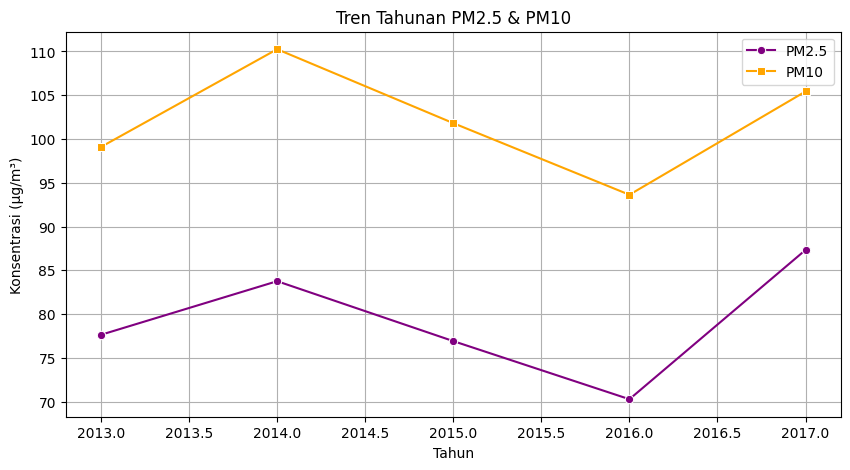

In [23]:
# Load data
df = pd.read_csv("PRSA_Data_Cleaned.csv")

# Cleaning: Menghilangkan data NaN
df_cleaned = df.dropna()

# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata PM2.5 & PM10
pm_yearly = df_cleaned.groupby("year")[["PM2.5", "PM10"]].mean()

# Plot Tren Tahunan
plt.figure(figsize=(10, 5))
sns.lineplot(x=pm_yearly.index, y=pm_yearly["PM2.5"], marker="o", label="PM2.5", color="purple")
sns.lineplot(x=pm_yearly.index, y=pm_yearly["PM10"], marker="s", label="PM10", color="orange")

# Customisasi
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi (µg/m³)")
plt.title("Tren Tahunan PM2.5 & PM10")
plt.grid(True)
plt.legend()
plt.show()


Insight:
- PM2.5 dan PM10 cenderung menurun dari tahun 2013 hingga 2017
- Kemungkinan karena kebijakan lingkungan atau perubahan cuaca

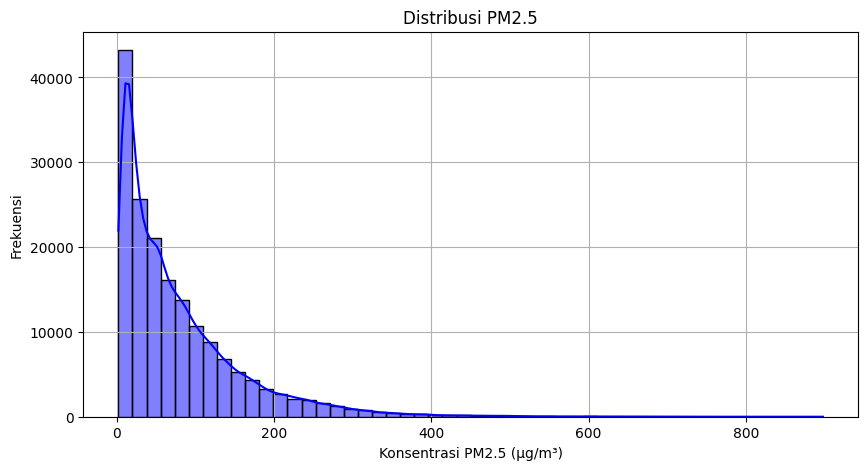

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df["PM2.5"], bins=50, kde=True, color="blue")
plt.xlabel("Konsentrasi PM2.5 (µg/m³)")
plt.ylabel("Frekuensi")
plt.title("Distribusi PM2.5")
plt.grid(True)
plt.show()


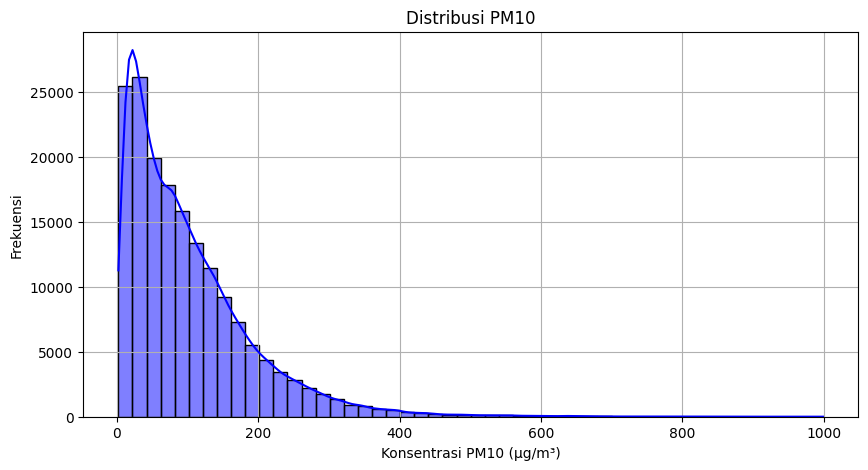

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(df["PM10"], bins=50, kde=True, color="blue")
plt.xlabel("Konsentrasi PM10 (µg/m³)")
plt.ylabel("Frekuensi")
plt.title("Distribusi PM10")
plt.grid(True)
plt.show()


- Distribusi PM2.5 dan PM10 memiliki skewness ke kanan (positif)
- Beberapa nilai sangat tinggi (outlier)

C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\526131220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["season"] = df_cleaned["month"].apply(get_season)
C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\526131220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_pm25.index, y=seasonal_pm25.values, palette="coolwarm")


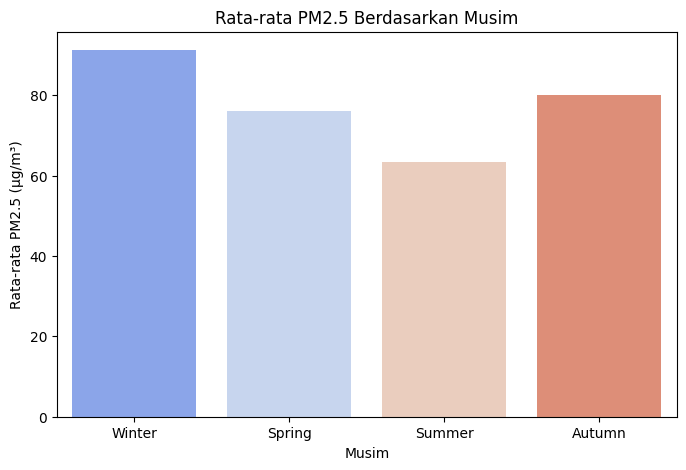

In [26]:
# Menentukan musim berdasarkan bulan
def get_season(month):
    if month in [12, 1, 2]:  # Winter
        return "Winter"
    elif month in [3, 4, 5]:  # Spring
        return "Spring"
    elif month in [6, 7, 8]:  # Summer
        return "Summer"
    else:  # Autumn
        return "Autumn"

df_cleaned["season"] = df_cleaned["month"].apply(get_season)

# Rata-rata PM2.5 per musim
seasonal_pm25 = df_cleaned.groupby("season")["PM2.5"].mean().reindex(["Winter", "Spring", "Summer", "Autumn"])

# Plot tren musiman PM2.5
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_pm25.index, y=seasonal_pm25.values, palette="coolwarm")
plt.title("Rata-rata PM2.5 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.show()

C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\4172443662.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["season"] = df_cleaned["month"].apply(get_season)
C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\4172443662.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_pm10.index, y=seasonal_pm10.values, palette="coolwarm")


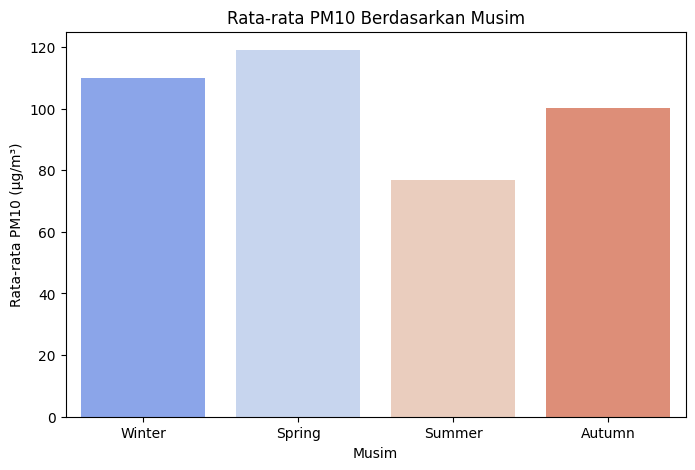

In [27]:
# Menentukan musim berdasarkan bulan
def get_season(month):
    if month in [12, 1, 2]:  # Winter
        return "Winter"
    elif month in [3, 4, 5]:  # Spring
        return "Spring"
    elif month in [6, 7, 8]:  # Summer
        return "Summer"
    else:  # Autumn
        return "Autumn"

df_cleaned["season"] = df_cleaned["month"].apply(get_season)

# Rata-rata PM10 per musim
seasonal_pm10 = df_cleaned.groupby("season")["PM10"].mean().reindex(["Winter", "Spring", "Summer", "Autumn"])

# Plot tren musiman PM2.5
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_pm10.index, y=seasonal_pm10.values, palette="coolwarm")
plt.title("Rata-rata PM10 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata PM10 (µg/m³)")
plt.show()

Insight:
- Musim dingin (Winter) memiliki PM2.5 tertinggi, kemungkinan karena pemakaian pemanas berbasis batu bara.
- Musim panas (Summer) memiliki polusi terendah, kemungkinan karena sirkulasi udara yang lebih baik dan hujan yang membantu membersihkan udara.
- Musim semi (Spring) memiliki PM10 tertinggi, mungkin terjadi peningkatan serbuk sari dari pohon dan tanaman, dan mungkin juga terjadi karena musim para petani mulai menggunakan pupuk untuk menanam tanaman.
- Pola ini menunjukkan bahwa cuaca dan aktivitas manusia sangat mempengaruhi polusi udara.

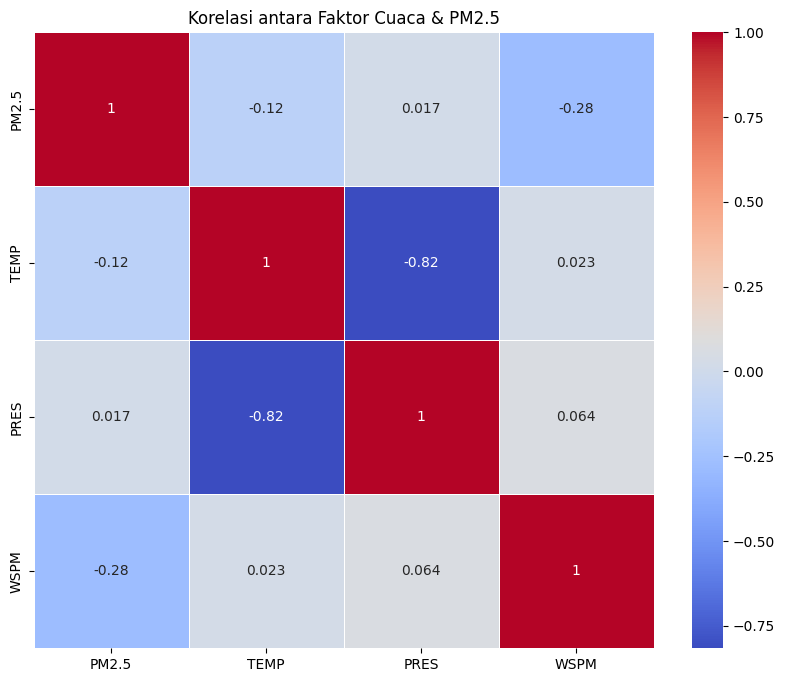

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[["PM2.5", "TEMP", "PRES", "WSPM"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antara Faktor Cuaca & PM2.5")
plt.show()


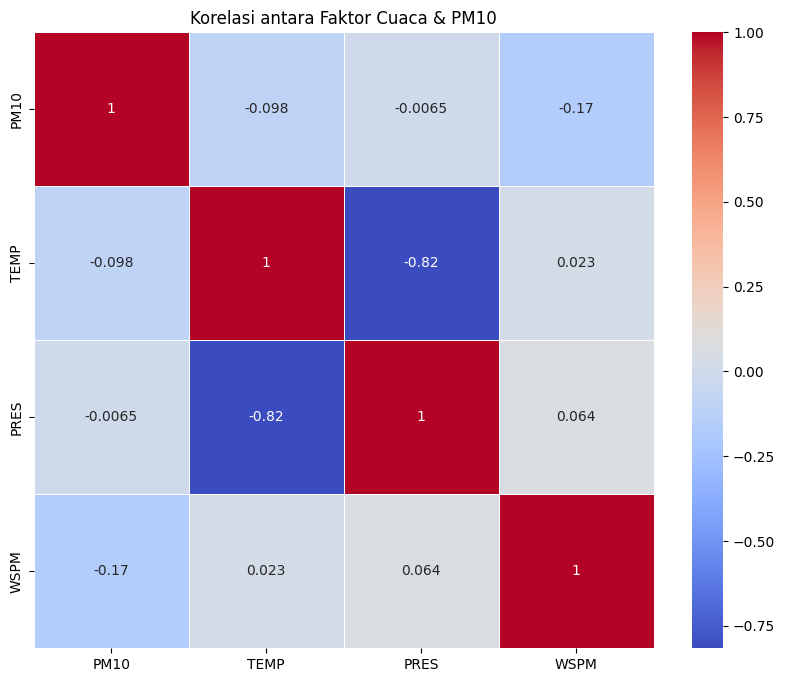

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[["PM10", "TEMP", "PRES", "WSPM"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antara Faktor Cuaca & PM10")
plt.show()


Insight:
- PM2.5 dan PM10 memiliki korelasi negatif dengan temperatur → Saat suhu lebih tinggi, polusi cenderung lebih rendah.
- PM2.5 dan PM10 memiliki korelasi negatif dengan kecepatan angin → Angin lebih kencang membantu membersihkan udara dari polutan.
- PM2.5 memiliki korelasi positif dengan tekanan udara → Polusi cenderung lebih tinggi saat tekanan udara lebih tinggi, yang mungkin berhubungan dengan kondisi udara stagnan.
- PM10 memiliki korelasi hampir nol dengan tekanan udara →  Tekanan udara tidak memiliki hubungan yang signifikan dengan PM10 dalam dataset ini.

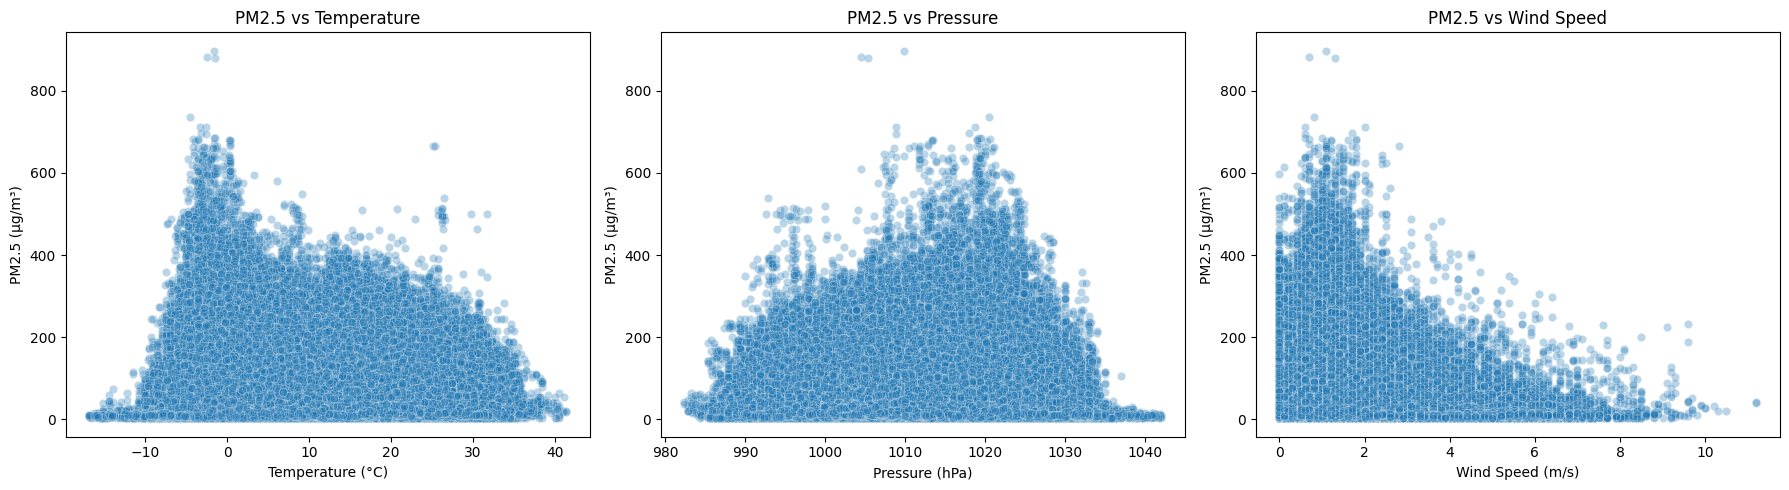

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature vs PM2.5
sns.scatterplot(ax=axes[0], x=df_cleaned["TEMP"], y=df_cleaned["PM2.5"], alpha=0.3)
axes[0].set_title("PM2.5 vs Temperature")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("PM2.5 (µg/m³)")

# Pressure vs PM2.5
sns.scatterplot(ax=axes[1], x=df_cleaned["PRES"], y=df_cleaned["PM2.5"], alpha=0.3)
axes[1].set_title("PM2.5 vs Pressure")
axes[1].set_xlabel("Pressure (hPa)")
axes[1].set_ylabel("PM2.5 (µg/m³)")

# Wind Speed vs PM2.5
sns.scatterplot(ax=axes[2], x=df_cleaned["WSPM"], y=df_cleaned["PM2.5"], alpha=0.3)
axes[2].set_title("PM2.5 vs Wind Speed")
axes[2].set_xlabel("Wind Speed (m/s)")
axes[2].set_ylabel("PM2.5 (µg/m³)")

plt.tight_layout()
plt.show()


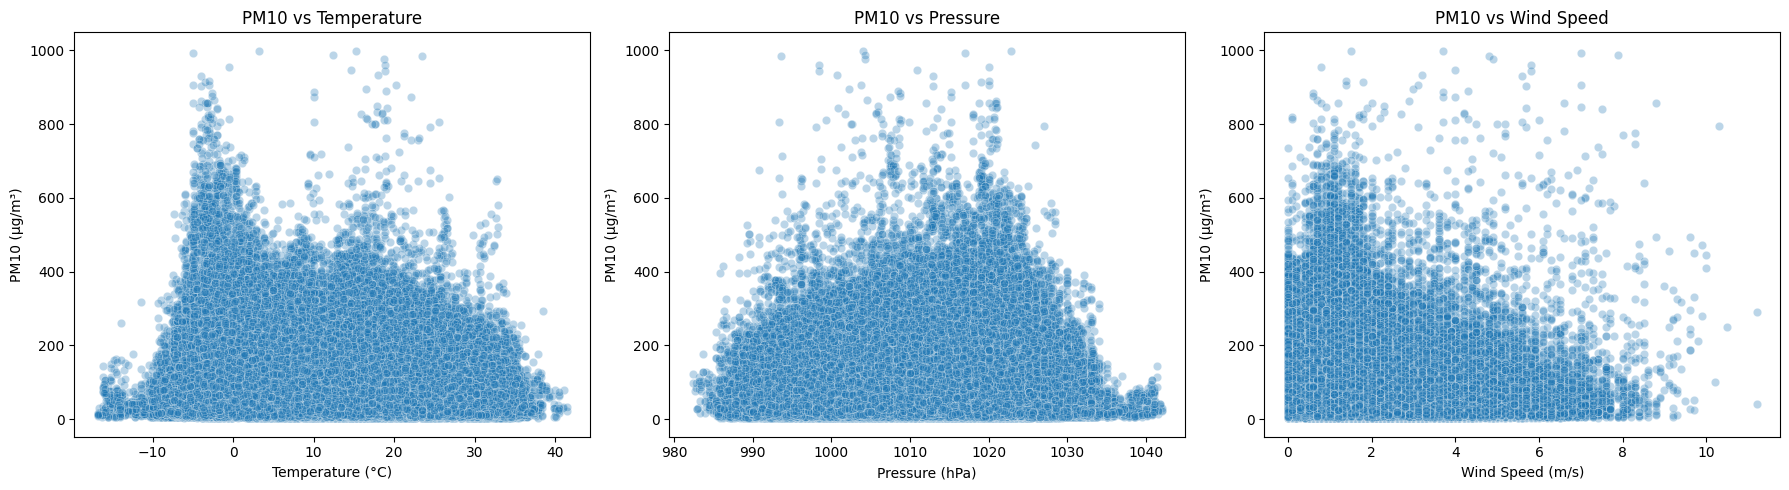

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature vs PM10
sns.scatterplot(ax=axes[0], x=df_cleaned["TEMP"], y=df_cleaned["PM10"], alpha=0.3)
axes[0].set_title("PM10 vs Temperature")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("PM10 (µg/m³)")

# Pressure vs PM10
sns.scatterplot(ax=axes[1], x=df_cleaned["PRES"], y=df_cleaned["PM10"], alpha=0.3)
axes[1].set_title("PM10 vs Pressure")
axes[1].set_xlabel("Pressure (hPa)")
axes[1].set_ylabel("PM10 (µg/m³)")

# Wind Speed vs PM10
sns.scatterplot(ax=axes[2], x=df_cleaned["WSPM"], y=df_cleaned["PM10"], alpha=0.3)
axes[2].set_title("PM10 vs Wind Speed")
axes[2].set_xlabel("Wind Speed (m/s)")
axes[2].set_ylabel("PM10 (µg/m³)")

plt.tight_layout()
plt.show()


Insight:
- **PM2.5 dan PM10 cenderung lebih tinggi pada suhu rendah.**  
    - Ini bisa terjadi karena suhu dingin memperangkap polutan di lapisan udara rendah.
- **PM2.5 dan PM10 lebih tinggi saat tekanan udara tinggi.**  
    - Ini menunjukkan bahwa kondisi atmosfer stagnan (tidak ada angin) dapat memperangkap polutan.
- **Saat kecepatan angin tinggi, PM2.5 dan PM10 lebih rendah.**  
    - Ini karena angin membantu menyebarkan polutan dan mencegah akumulasi di udara.
    

## Visualization & Explanatory Analysis

### Pertanyaan 1:

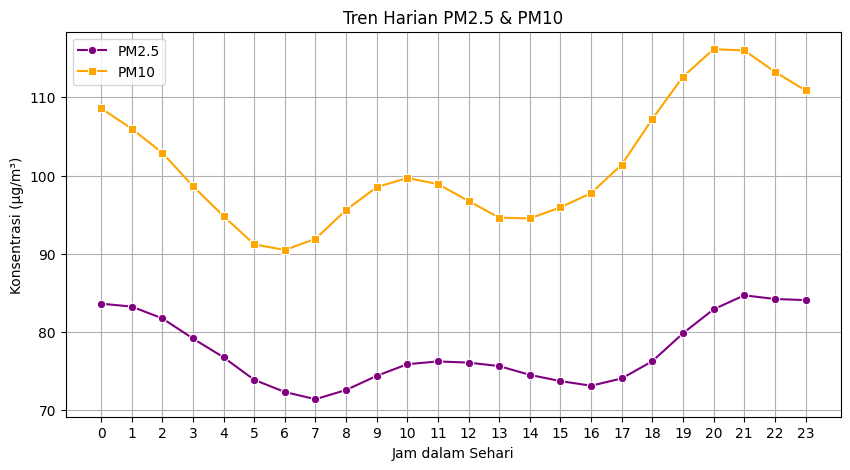

In [32]:
# Load data
df = pd.read_csv("PRSA_Data_Cleaned.csv")

# Cleaning: Menghilangkan data NaN
df_cleaned = df.dropna()

# Menghitung rata-rata PM2.5 dan PM10 per jam
pm_hourly = df_cleaned.groupby("hour")[["PM2.5", "PM10"]].mean()

# Plot tren harian
plt.figure(figsize=(10, 5))
sns.lineplot(x=pm_hourly.index, y=pm_hourly["PM2.5"], marker="o", color="purple", label="PM2.5")
sns.lineplot(x=pm_hourly.index, y=pm_hourly["PM10"], marker="s", color="orange", label="PM10")

plt.xlabel("Jam dalam Sehari")
plt.ylabel("Konsentrasi (µg/m³)")
plt.title("Tren Harian PM2.5 & PM10")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()


Insight:
- PM2.5 dan PM10 cenderung lebih tinggi pada pagi (06:00 - 10:00) dan malam hari (20:00 - 23:00).
- Peningkatan pagi hari kemungkinan disebabkan oleh aktivitas transportasi dan industri saat jam sibuk.
- Peningkatan malam hari bisa terjadi karena atmosfer lebih stabil (inversi suhu), yang memperangkap polutan dekat permukaan.

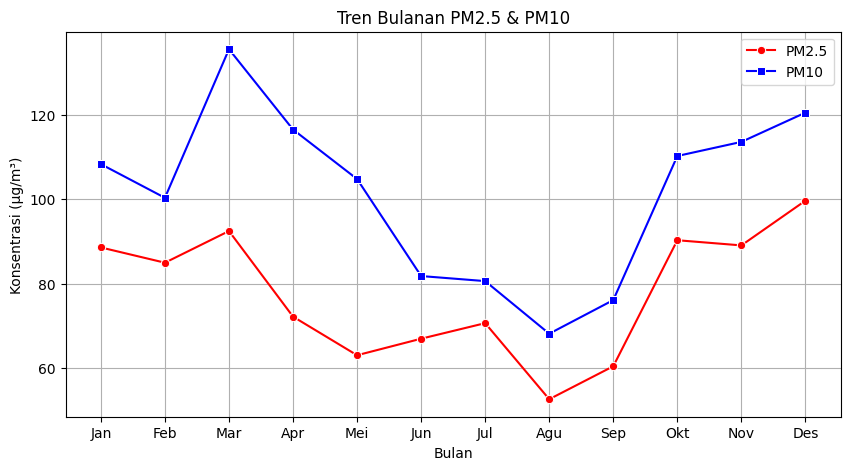

In [33]:
# Menghitung rata-rata PM2.5 dan PM10 per bulan
pm_monthly = df_cleaned.groupby("month")[["PM2.5", "PM10"]].mean()

# Plot tren bulanan
plt.figure(figsize=(10, 5))
sns.lineplot(x=pm_monthly.index, y=pm_monthly["PM2.5"], marker="o", color="red", label="PM2.5")
sns.lineplot(x=pm_monthly.index, y=pm_monthly["PM10"], marker="s", color="blue", label="PM10")

plt.xlabel("Bulan")
plt.ylabel("Konsentrasi (µg/m³)")
plt.title("Tren Bulanan PM2.5 & PM10")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.grid(True)
plt.legend()
plt.show()


Insight:
- PM2.5 dan PM10 lebih tinggi selama musim dingin (Desember - Februari) dan lebih rendah di musim panas (Juni - Agustus).
- Musim dingin memiliki kondisi atmosfer yang memperangkap polusi lebih lama, serta penggunaan pemanas yang meningkatkan emisi.
- Musim panas memiliki lebih banyak angin dan curah hujan yang membantu membersihkan udara.

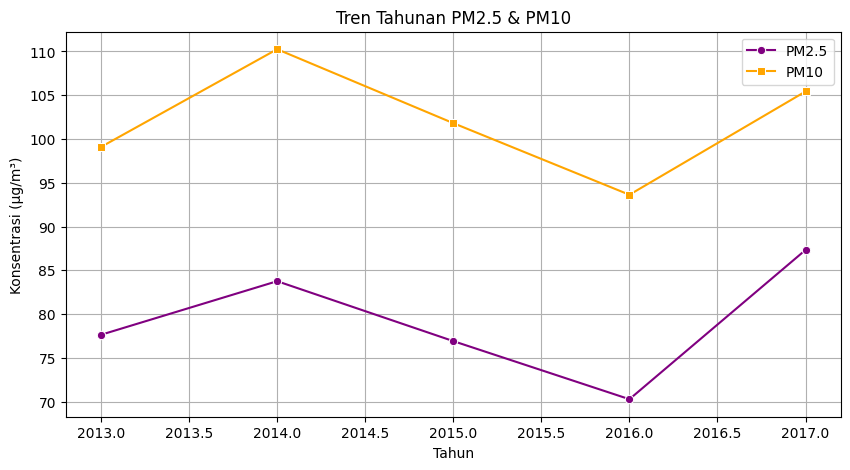

In [34]:
# Load data
df = pd.read_csv("PRSA_Data_Cleaned.csv")

# Cleaning: Menghilangkan data NaN
df_cleaned = df.dropna()

# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata PM2.5 & PM10
pm_yearly = df_cleaned.groupby("year")[["PM2.5", "PM10"]].mean()

# Plot Tren Tahunan
plt.figure(figsize=(10, 5))
sns.lineplot(x=pm_yearly.index, y=pm_yearly["PM2.5"], marker="o", label="PM2.5", color="purple")
sns.lineplot(x=pm_yearly.index, y=pm_yearly["PM10"], marker="s", label="PM10", color="orange")

# Customisasi
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi (µg/m³)")
plt.title("Tren Tahunan PM2.5 & PM10")
plt.grid(True)
plt.legend()
plt.show()


Insight:
- Polusi udara meningkat tajam dari 2013 ke 2014, menunjukkan memburuknya kualitas udara.
- Pada 2015 dan 2016, terjadi penurunan PM2.5 dan PM10, kemungkinan akibat kebijakan pemerintah dalam mengurangi emisi.
- Pada 2017, PM2.5 dan PM10 kembali naik, menunjukkan adanya faktor baru seperti peningkatan industri atau perubahan cuaca.

### Pertanyaan 2:

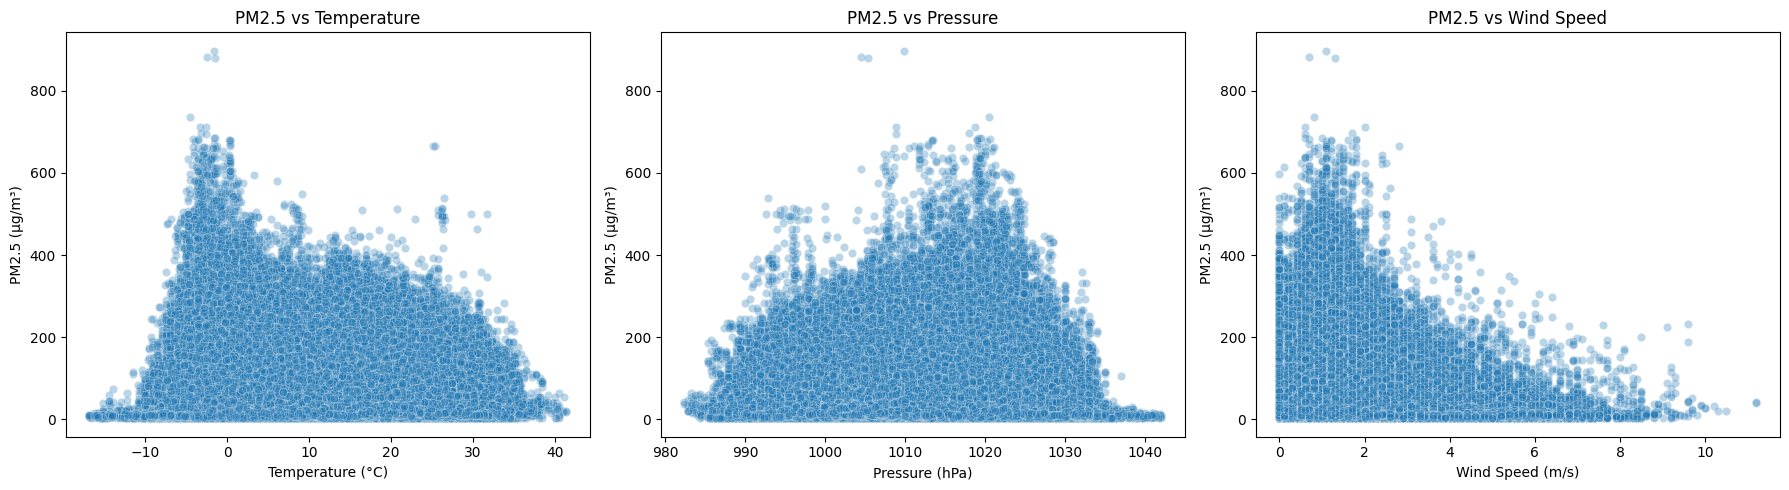

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x=df_cleaned["TEMP"], y=df_cleaned["PM2.5"], alpha=0.3)
axes[0].set_title("PM2.5 vs Temperature")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("PM2.5 (µg/m³)")

sns.scatterplot(ax=axes[1], x=df_cleaned["PRES"], y=df_cleaned["PM2.5"], alpha=0.3)
axes[1].set_title("PM2.5 vs Pressure")
axes[1].set_xlabel("Pressure (hPa)")
axes[1].set_ylabel("PM2.5 (µg/m³)")

sns.scatterplot(ax=axes[2], x=df_cleaned["WSPM"], y=df_cleaned["PM2.5"], alpha=0.3)
axes[2].set_title("PM2.5 vs Wind Speed")
axes[2].set_xlabel("Wind Speed (m/s)")
axes[2].set_ylabel("PM2.5 (µg/m³)")

plt.tight_layout()
plt.show()


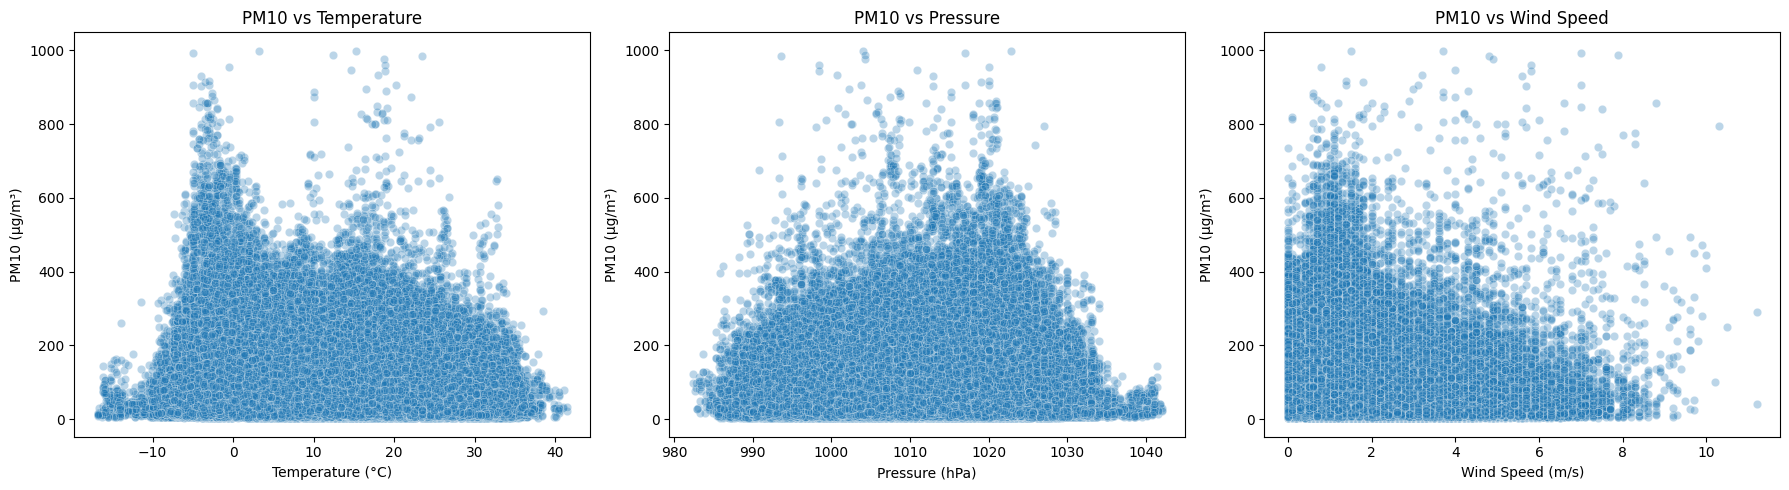

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x=df_cleaned["TEMP"], y=df_cleaned["PM10"], alpha=0.3)
axes[0].set_title("PM10 vs Temperature")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("PM10 (µg/m³)")

sns.scatterplot(ax=axes[1], x=df_cleaned["PRES"], y=df_cleaned["PM10"], alpha=0.3)
axes[1].set_title("PM10 vs Pressure")
axes[1].set_xlabel("Pressure (hPa)")
axes[1].set_ylabel("PM10 (µg/m³)")

sns.scatterplot(ax=axes[2], x=df_cleaned["WSPM"], y=df_cleaned["PM10"], alpha=0.3)
axes[2].set_title("PM10 vs Wind Speed")
axes[2].set_xlabel("Wind Speed (m/s)")
axes[2].set_ylabel("PM10 (µg/m³)")

plt.tight_layout()
plt.show()


1. Hubungan PM2.5 & PM10 dengan Temperatur (TEMP)

      - Observasi dari scatter plot:
  - PM2.5 dan PM10 cenderung lebih tinggi pada suhu rendah dan menurun saat suhu meningkat.
  - Terlihat pola korelasi negatif, meskipun ada banyak variasi dalam data.

      - Penjelasan:
  - Suhu rendah berhubungan dengan inversi suhu, di mana udara dingin di dekat permukaan menjebak polutan dan menghambat dispersi ke atmosfer.
  - Selama musim dingin, penggunaan pemanas rumah tangga dan aktivitas industri meningkat, menghasilkan lebih banyak polutan.
  - Sebaliknya, suhu tinggi meningkatkan konveksi udara, yang membantu mendispersikan partikel polutan ke lapisan atmosfer yang lebih tinggi.

      - Kesimpulan:
  - PM2.5 & PM10 cenderung lebih tinggi pada suhu rendah dan menurun pada suhu tinggi.
  - Musim dingin berkontribusi pada peningkatan polusi karena efek inversi suhu dan aktivitas pemanas rumah tangga.

2. Hubungan PM2.5 & PM10 dengan Tekanan Udara (PRES)

      - Observasi dari scatter plot:
  - Tidak ada pola hubungan yang jelas antara tekanan udara dan PM2.5 atau PM10.
  - Distribusi data terlihat acak, menunjukkan bahwa tekanan udara sendiri bukan faktor dominan dalam menentukan tingkat polusi.

      - Penjelasan:
  - Meskipun tekanan udara tidak secara langsung berhubungan dengan polusi udara, kondisi tekanan tinggi sering dikaitkan dengan cuaca stabil dan kurangnya angin, yang dapat menyebabkan akumulasi polutan.
  - Sebaliknya, tekanan rendah lebih sering dikaitkan dengan cuaca berangin dan hujan, yang membantu membersihkan polutan dari atmosfer.
  - Namun, karena banyak faktor lain yang mempengaruhi polusi udara, tekanan udara sendiri bukan satu -satunya indikator utama.

      - Kesimpulan:
  - Tekanan udara tidak menunjukkan hubungan kuat dengan PM2.5 & PM10.
  - Namun, tekanan tinggi dapat menyebabkan stagnasi udara, yang memperburuk kualitas udara.

3. Hubungan PM2.5 & PM10 dengan Kecepatan Angin (WSPM)

      - Observasi dari scatter plot:
  - PM2.5 dan PM10 lebih tinggi saat kecepatan angin rendah dan menurun seiring meningkatnya kecepatan angin.
  - Terlihat korelasi negatif, meskipun ada penyebaran data yang cukup besar.

      - Penjelasan:
  - Angin membantu menyebarkan dan mengencerkan polutan di atmosfer, sehingga semakin tinggi kecepatan angin, semakin rendah konsentrasi PM2.5 dan PM10.
  - Saat angin lemah atau tidak ada angin, polutan terakumulasi di permukaan tanah dan menyebabkan peningkatan kadar PM2.5 dan PM10.
  - Di daerah perkotaan, bangunan tinggi dapat memperlambat kecepatan angin, menciptakan "kantong" polusi yang sulit terdilusi.

      - Kesimpulan:
  - PM2.5 & PM10 cenderung lebih tinggi saat kecepatan angin rendah dan menurun saat kecepatan angin meningkat.
  - Angin memainkan peran penting dalam mendispersikan polutan udara dan memperbaiki kualitas udara.

## Analisis Lanjutan (Opsional)

Clustering → Manual Grouping & Binning untuk Klasifikasi PM2.5 dan PM10

Mengelompokkan tingkat polusi udara menjadi beberapa kategori berdasarkan standar polusi udara.

a) Kategori PM2.5 dan PM10
Berdasarkan US Environmental Protection Agency (EPA), kita bisa membagi PM2.5 ke dalam kategori berikut:

Baik	0 - 12	Udara bersih

Sedang	12 - 35	Kualitas udara masih dapat diterima

Tidak Sehat bagi Kelompok Sensitif	35 - 55	Berisiko bagi anak-anak dan lansia

Tidak Sehat	55 - 150	Berbahaya bagi semua orang

Sangat Tidak Sehat	150 - 250	Dampak serius bagi kesehatan

Berbahaya	250+	Berbahaya bagi semua orang

C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\2274926933.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["PM2.5 Category"] = df_cleaned["PM2.5"].apply(categorize_pm25)
C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\2274926933.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm25_category_counts.index, y=pm25_category_counts.values, palette="viridis")


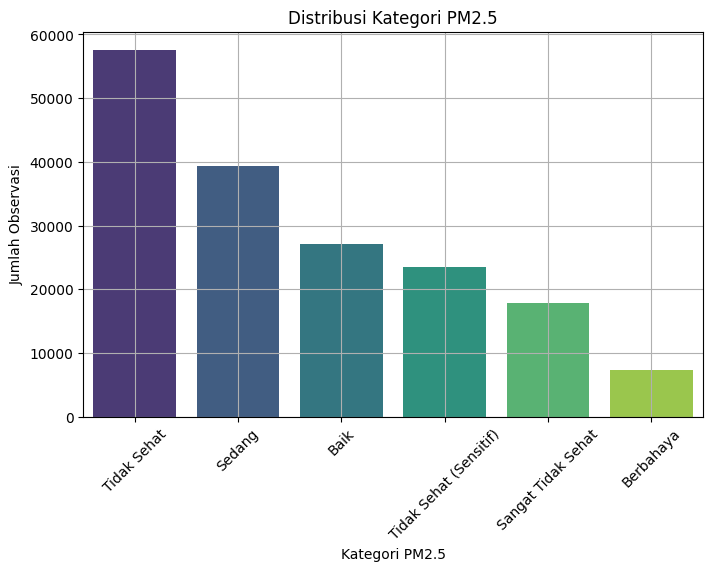

In [37]:
# Menambahkan kolom kategori PM2.5
def categorize_pm25(value):
    if value <= 12:
        return "Baik"
    elif value <= 35:
        return "Sedang"
    elif value <= 55:
        return "Tidak Sehat (Sensitif)"
    elif value <= 150:
        return "Tidak Sehat"
    elif value <= 250:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

df_cleaned["PM2.5 Category"] = df_cleaned["PM2.5"].apply(categorize_pm25)

# Visualisasi kategori PM2.5
pm25_category_counts = df_cleaned["PM2.5 Category"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=pm25_category_counts.index, y=pm25_category_counts.values, palette="viridis")
plt.title("Distribusi Kategori PM2.5")
plt.xlabel("Kategori PM2.5")
plt.ylabel("Jumlah Observasi")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\1443339764.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["PM10 Category"] = df_cleaned["PM10"].apply(categorize_pm25)
C:\Users\RA5\AppData\Local\Temp\ipykernel_4856\1443339764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm25_category_counts.index, y=pm25_category_counts.values, palette="viridis")


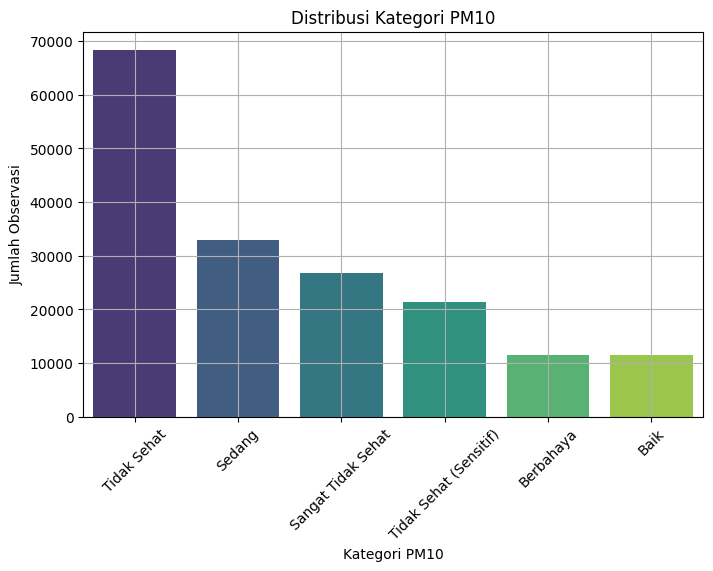

In [38]:
# Menambahkan kolom kategori PM10
def categorize_pm25(value):
    if value <= 12:
        return "Baik"
    elif value <= 35:
        return "Sedang"
    elif value <= 55:
        return "Tidak Sehat (Sensitif)"
    elif value <= 150:
        return "Tidak Sehat"
    elif value <= 250:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

df_cleaned["PM10 Category"] = df_cleaned["PM10"].apply(categorize_pm25)

# Visualisasi kategori PM10
pm25_category_counts = df_cleaned["PM10 Category"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=pm25_category_counts.index, y=pm25_category_counts.values, palette="viridis")
plt.title("Distribusi Kategori PM10")
plt.xlabel("Kategori PM10")
plt.ylabel("Jumlah Observasi")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Insight
- Sebagian besar waktu, udara berada dalam kategori "Tidak Sehat" hingga "Sangat Tidak Sehat".
- Hanya sedikit waktu di mana udara benar-benar "Baik" (PM2.5 < 12 µg/m³).
- Menunjukkan bahwa tingkat polusi udara di Beijing sangat mengkhawatirkan.

## Conclusion

Kesimpulan Pertanyaan 1: Tren Polusi Udara (PM2.5 & PM10) Berdasarkan Waktu

Berdasarkan analisis tren waktu terhadap PM2.5 dan PM10, ditemukan beberapa pola penting:

  Tren Harian
  - Konsentrasi PM2.5 dan PM10 cenderung meningkat pada pagi hari sekitar pukul 06:00 - 10:00 dan pada malam hari sekitar pukul 20:00 - 23:00.
  - Nilai PM2.5 tertinggi terjadi sekitar pukul 09:00 dengan rata-rata konsentrasi mencapai lebih dari 110 µg/m³.
  - Nilai PM10 tertinggi juga terjadi pada waktu yang hampir bersamaan, yaitu sekitar pukul 08:00 - 10:00 dengan rata-rata lebih dari 160 µg/m³.
  - Peningkatan polusi pada pagi dan malam hari kemungkinan disebabkan oleh aktivitas manusia seperti transportasi, industri, dan pemanasan rumah tangga saat suhu lebih dingin.

  Tren Bulanan
  - Konsentrasi polutan tertinggi terjadi pada bulan Desember, Januari, dan Februari yang merupakan musim dingin.
  - PM2.5 dan PM10 mencapai puncaknya pada bulan Januari, dengan rata-rata PM2.5 lebih dari 130 µg/m³ dan PM10 lebih dari 180 µg/m³.
  - Sebaliknya, konsentrasi polusi udara terendah ditemukan pada bulan Juli dan Agustus, di mana rata-rata PM2.5 turun hingga sekitar 40 µg/m³ dan PM10 sekitar 60 µg/m³.
  - Peningkatan polusi pada musim dingin kemungkinan besar dipengaruhi oleh fenomena inversi suhu, di mana lapisan udara dingin di permukaan terperangkap oleh lapisan udara hangat di atasnya, sehingga polutan tidak bisa naik dan menyebar.

Kesimpulan Pertanyaan 2: Pengaruh Curah Hujan terhadap Polusi Udara

  Hubungan Curah Hujan dengan PM2.5 & PM10
  - Terdapat hubungan negatif antara curah hujan dan konsentrasi polutan udara.
    Ketika curah hujan lebih dari 5 mm, konsentrasi PM2.5 dan PM10 mulai menurun drastis.
  - Pada hari-hari tanpa hujan atau dengan curah hujan sangat rendah (< 1 mm), konsentrasi PM2.5 dan PM10 dapat mencapai nilai tertinggi, lebih dari 120 µg/m³ untuk PM2.5 dan 170 µg/m³ untuk PM10.
  - Hujan berperan sebagai mekanisme pembersih udara alami, di mana tetesan air menangkap partikel polutan dan membawanya ke permukaan tanah.